### Análise de dados visuais

Esse notebook é para produção de visualizações focadas nos datasets. A ideia é investigar de forma proativa e gerar visuais profissionais e bem estruturados para leitura geral. As informações aqui contidas possuem como fonte o site Oracle's Elixir.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

full_data = pd.read_csv("../data/full_data/2025_LoL_esports_match_data_from_OraclesElixir (1).csv")

player_full_data = full_data[(full_data["position"] != "team") & (full_data["datacompleteness"] == "complete")]

C:\Users\yandrade\AppData\Local\Temp\ipykernel_18512\1276548405.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data = pd.read_csv("../data/full_data/2025_LoL_esports_match_data_from_OraclesElixir (1).csv")


In [2]:
x = player_full_data[player_full_data["playername"] == "Wizer"]["xpdiffat10"]

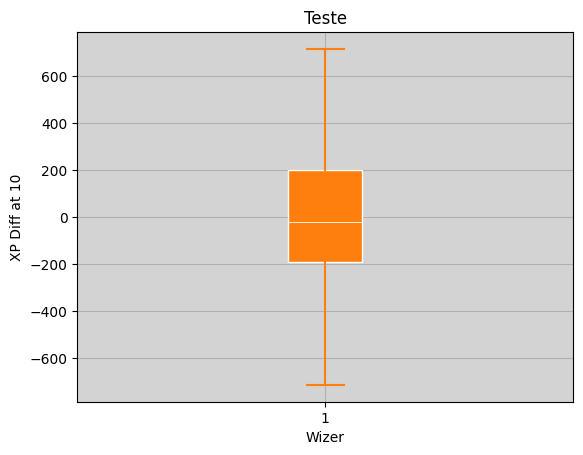

In [ ]:
fig, ax = plt.subplots()

dataviz = ax.boxplot(
    x, 
    showmeans=False,
    showfliers=False, # Remove os outliers da visualização
    patch_artist=True,
    medianprops={"color":"white","linewidth":"0.6"},
    boxprops={"facecolor": "C1","edgecolor":"white"},
    whiskerprops={"color":"C1","linewidth":1.5},
    capprops={"color":"C1","linewidth":1.5},
    )

ax.set_title("Teste")
ax.set_xlabel("Wizer")
ax.set_ylabel("XP Diff at 10")
ax.set_facecolor("lightgray")
#ax.grid()